In [1]:
import pyodbc 
import pandas as pd
import matplotlib.pyplot as plt

## Connecting to my SQL server which is hosted in Microsoft SQL Server 18

In [2]:
driver = '{SQL Server}'
server = 'LAPTOP-S1H0GINM\MYSERVER' 
database = 'Cranfield' 

conn = pyodbc.connect('Driver=' +driver+ ';'
                      'Server=' +server+ ';'
                      'Database=' +database+ ';'
                      'Trusted_Connection=yes;')

## Loading dataset from Local SQL server. The dataset originates from mathworks.com. On mathworks this is the description of the dataset:

This package contains data sets collected in the Cranfield Multiphase Flow Facility aiming to serve as a benchmark case for statistic process monitoring. It includes some examples of Canonical Variate Analysis (CVA) on these data sets.

##### Cite As
Yi Cao (2020). A Benchmark Case for Statistical Process Monitoring - Cranfield Multiphase Flow Facility (https://www.mathworks.com/matlabcentral/fileexchange/50938-a-benchmark-case-for-statistical-process-monitoring-cranfield-multiphase-flow-facility), MATLAB Central File Exchange. Retrieved December 9, 2020.

In [15]:
table = '.dbo.T1'
sql_query = pd.read_sql_query('SELECT * FROM ' +database+ table,conn)
T1 = pd.DataFrame(sql_query)

table = '.dbo.T2'
sql_query = pd.read_sql_query('SELECT * FROM ' +database+ table,conn)
T2 = pd.DataFrame(sql_query)

table = '.dbo.T3'
sql_query = pd.read_sql_query('SELECT * FROM ' +database+ table,conn)
T3 = pd.DataFrame(sql_query)

table = '.dbo.explain'
sql_query = pd.read_sql_query('SELECT * FROM ' +database+ table,conn)
explain = pd.DataFrame(sql_query)

Location = explain.Location
Unit = explain.Unit

T1.drop('column1',axis = 1, inplace=True)
T1.columns = range(24)

T2.drop('column1',axis = 1, inplace=True)
T2.columns = range(24)

T3.drop('column1',axis = 1, inplace=True)
T3.columns = range(24)

## Plotting all 24 variables in seperate graphs

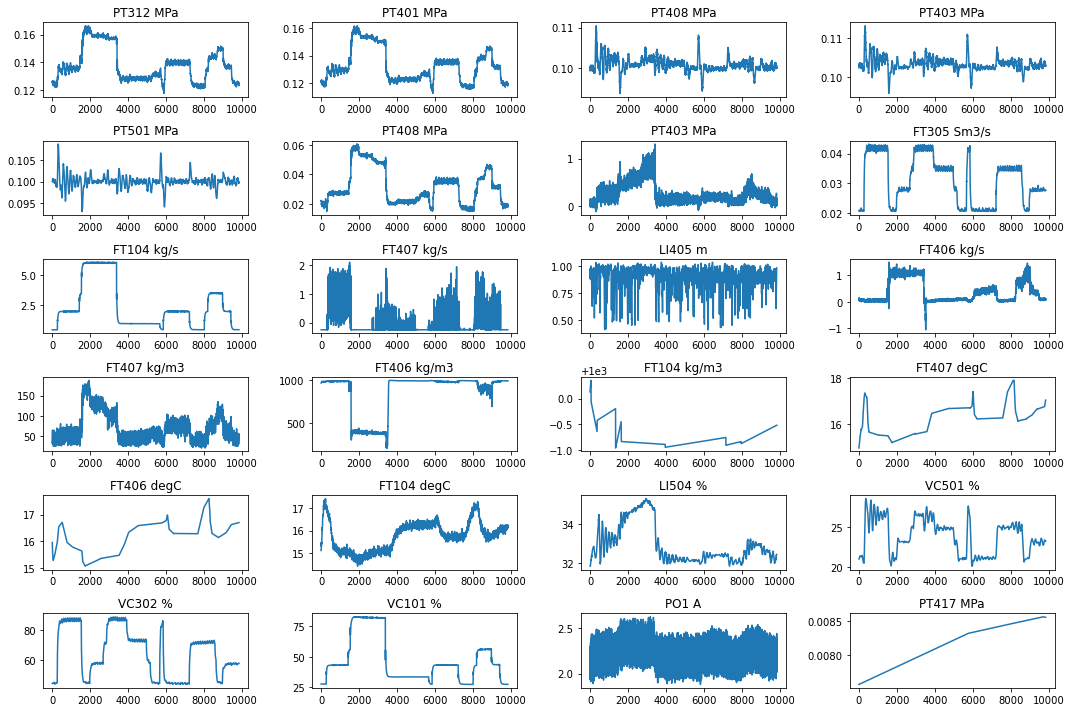

In [18]:
n=0
plot8 = plt.figure(figsize=(15,10))
for col in T2.columns:
    n=n+1
    plt.subplot(6,4,n)
    plt.plot(T2[col])
    plt.title(Location[col] +' '+ Unit[col])
plt.tight_layout()

## Plotting all 24 variables in seperate boxplots

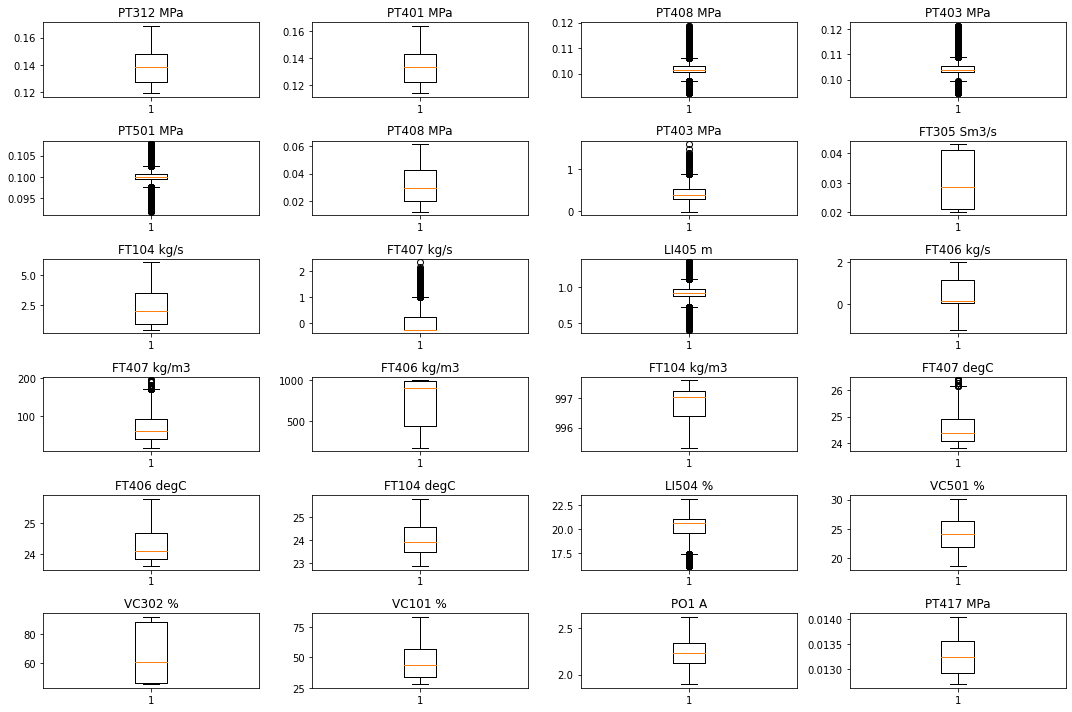

In [17]:
n=0
plot9 = plt.figure(figsize=(15,10))
for col in T3.columns:
    n=n+1
    plt.subplot(6,4,n)
    plt.boxplot(T3[col])
    plt.title(Location[col] +' '+ Unit[col])
plt.tight_layout()